<a href="https://colab.research.google.com/github/qpwisu/Financial_data_analysis/blob/main/%EC%9B%90%EC%9E%90%EC%9E%AC%EC%99%80_%EC%A3%BC%EC%8B%9D%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bs4
!pip install pykrx

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [5]:
#https://buyandpray.tistory.com/39
#https://kr.investing.com/에서 ajax를 통해 서버에 요청해 철광석 가격을 받아왔다
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd
def x(y):
  z=re.sub(",","",y)
  return z
def getRawMaterials(st_date, end_date, curr_id, smlID , name):
  headers = {
    'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36',
    'X-Requested-With' : 'XMLHttpRequest'
  }
  formData = {
      "curr_id" : curr_id,
      "smlID" :smlID,
      "header" : "",
      "st_date" : st_date,
      "end_date" : end_date,
      "interval_sec" : "Daily",
      "sort_col" : "date",
      "sort_ord" : "DESC",
      "action" : "historical_data"
  }

  POSTURL = r"https://kr.investing.com/instruments/HistoricalDataAjax"


  formData["header"] = name + " 내역"

  response = requests.post(POSTURL, headers=headers, data=formData)
  if response.status_code == 200:
      html = response.text
      soup = BeautifulSoup(html,'html.parser') 
      items= soup.select("tr")
      items = items[1:-1]
      li= []

      for item in items:
        i = item.text.split("\n")[1:7]
        i[0]=re.sub(r"(\d{4})년 (\d{2})월 (\d{2})일",r"\g<1>\g<2>\g<3>",i[0])
        i.append(i[5].split(" ")[1])
        i[5]= i[5].split(" ")[0]
        li.append(i)
      name_list = ["날짜","종가","오픈","고가",'저기',"거래량","변동%"]
      df = pd.DataFrame(li,columns=name_list)
      df.set_index("날짜",inplace=True)
      df=df[::-1]
      
      index1 =df["종가"].apply(x).to_frame(name=name)

      index1=index1.astype('float')
      index1.reset_index(inplace=True)
      index1=index1.astype({'날짜':'string'})
      index1.set_index("날짜",inplace=True)
      return index1
   

In [6]:
from pykrx import stock
from pykrx import bond
from tqdm import tqdm
def stock_price(index1,stock_li):
  for i in tqdm(stock_li):
    df2 = stock.get_market_ohlcv("20210601", "20220213", i)
    index2 = df2["종가"].to_frame(name=i)
    index2=index2.astype('float')
    index2.reset_index(inplace=True)
    index2=index2.astype({'날짜':'string'})
    index2.set_index("날짜",inplace=True)
    index1=pd.merge(index1, index2,left_index=True, right_index=True ,how='outer')
  return index1
    

철광석의 경우 관련 종목과의 상관관계가 양의 상관계수로 꽤 높게 측정된다. 철광석가격이 오를 수록 주가 역시 오른다 

060380    0.616154

084010    0.588009

017480    0.587893

008260    0.571037

002220    0.515273

100%|██████████| 9/9 [00:05<00:00,  1.73it/s]

철광석      NaN
001230   NaN
060380   NaN
001080   NaN
017480   NaN
084010   NaN
058430   NaN
002220   NaN
008260   NaN
016380   NaN
Name: 철광석, dtype: float64


findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_ag

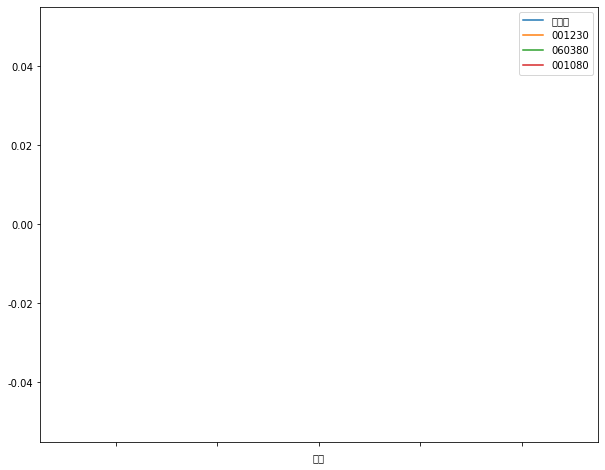

In [7]:
index1=getRawMaterials("2021/09/01","2022/02/15","961729","301009","철광석")
stock_li = ["001230","060380","001080","017480","084010","058430","002220","008260","016380"]
index1= stock_price(index1,stock_li)
index1 =index1.dropna(axis=0)
#상관관계 1998140207971
corr = index1.corr(method = 'pearson')
high_correlation=corr.iloc[0].sort_values(ascending = False)[0:4].index.tolist()
high_correlation=index1[high_correlation]
print(corr.iloc[0].sort_values(ascending = False))

#정규화
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())
df_minmax_norm = minmax_norm(high_correlation)
df_minmax_norm.plot.line(figsize=(10,8))

구리와 관련주들의 상관계수가 낮은편이다 큰 영향을 끼치지 않는다는 의미 

구리        1.000000
025820    0.112664
103140    0.077099
012800   -0.011777
021050   -0.182484
229640   -0.098569
Name: 구리, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text

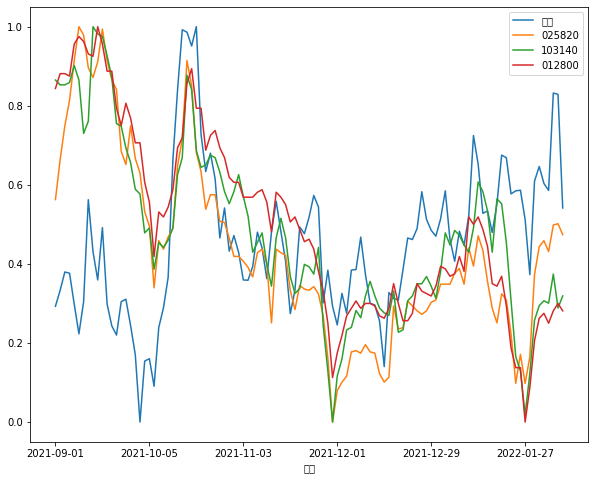

In [ ]:
index1=getRawMaterials("2021/09/01","2022/02/15","8831","300012","구리")

stock_li = ["025820","103140","012800","021050","229640"]
index1= stock_price(index1,stock_li)
index1 =index1.dropna(axis=0)
#상관관계 1998140207971
corr = index1.corr(method = 'pearson')
high_correlation=corr.iloc[0].sort_values(ascending = False)[0:4].index.tolist()
high_correlation=index1[high_correlation]
print(corr.iloc[0])

#정규화
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())
df_minmax_norm = minmax_norm(high_correlation)
df_minmax_norm.plot.line(figsize=(10,8))


알루미늄도 상관계수가 낮게 나온다 

알루미늄      1.000000
006110    0.095683
001530   -0.068785
018470    0.299780
069460   -0.263459
128660   -0.107890
186230    0.226369
054410    0.040189
009620   -0.325253
008350   -0.063591
009520   -0.207327
177830    0.303111
Name: 알루미늄, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50508 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text

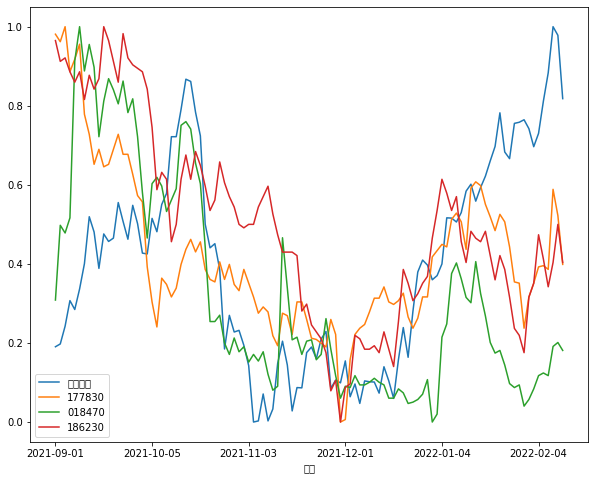

In [ ]:
index1=getRawMaterials("2021/09/01","2022/02/15","49768","300586","알루미늄")
stock_li = ["006110","001530","018470","069460","128660","186230","054410","009620","008350","009520","177830"]
index1= stock_price(index1,stock_li)
index1 =index1.dropna(axis=0)
#상관관계 1998140207971
corr = index1.corr(method = 'pearson')
high_correlation=corr.iloc[0].sort_values(ascending = False)[0:4].index.tolist()
high_correlation=index1[high_correlation]
print(corr.iloc[0])

#정규화
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())
df_minmax_norm = minmax_norm(high_correlation)
df_minmax_norm.plot.line(figsize=(10,8))

In [6]:
#모든종목 종가 dataframe으로 가져오기 

start_day = "20180101"
end_day = "20220216"
def str_day(d):
  return d.strftime('%Y%m%d')
tmp = stock.get_market_ohlcv(start_day, end_day, "005930")
days= list(map(str_day,tmp.index.to_list()))


tmp = stock.get_market_ohlcv(days[0], market="ALL")
df_stock=tmp["종가"].to_frame(name=days[0]).T
for day in tqdm(days[1:]):
  ddf = stock.get_market_ohlcv(day, market="ALL")
  a=ddf["종가"].to_frame(name=day).T
  df_stock=pd.concat([df_stock,a])

100%|██████████| 1015/1015 [19:37<00:00,  1.16s/it]


In [16]:
start_day2 = start_day[0:4]+"/"+start_day[4:6]+"/"+start_day[6:8]
end_day2 = end_day[0:4]+"/"+end_day[4:6]+"/"+end_day[6:8]
id_list=[["49768","300586","알루미늄"],["8831","300012","구리"],["961729","301009","철광석"],["8849","300060","WTI유"],["8862","300092","천연가스"],["8830","300004","금"],["959208","300751","니켈"],["8848","300052","탄소배출권"]]

index1=getRawMaterials(start_day2,end_day2,id_list[0][0],id_list[0][1],id_list[0][2])

for i in range(1,len(id_list)):
  curr_id=id_list[i][0]
  smlID=id_list[i][1]
  header=id_list[i][2]
  index2=getRawMaterials(start_day2,end_day2,curr_id,smlID,header)
  index1=pd.merge(index1, index2,left_index=True, right_index=True ,how='outer')




index1 =index1.fillna(method='ffill')
index1 = index1.dropna(axis=0)
index1
# index2=index2.astype('float')
# index2.reset_index(inplace=True)
# index2=index2.astype({'날짜':'string'})
# index2.set_index("날짜",inplace=True)


NameError: ignored

In [11]:

#상관관계 1998140207971
corr = index1.corr(method = 'spearman')
corr.abs()

,알루미늄,구리,철광석,WTI유,천연가스,금,니켈,탄소배출권
알루미늄,1.000000,0.876873,0.229064,0.840784,0.839722,0.093827,0.610705,0.388636
구리,0.876873,1.000000,0.528684,0.635823,0.663874,0.454340,0.740614,0.552763
철광석,0.229064,0.528684,1.000000,0.010759,0.074316,0.783430,0.631837,0.837622
WTI유,0.840784,0.635823,0.010759,1.000000,0.705375,0.179329,0.474980,0.266975
천연가스,0.839722,0.663874,0.074316,0.705375,1.000000,0.041660,0.421482,0.312503
금,0.093827,0.454340,0.783430,0.179329,0.041660,1.000000,0.636717,0.638398
니켈,0.610705,0.740614,0.631837,0.474980,0.421482,0.636717,1.000000,0.715527
탄소배출권,0.388636,0.552763,0.837622,0.266975,0.312503,0.638398,0.715527,1.000000


전종목들과 알루미늄, 구리 , 철광석의 상관관계를 구했지만 
관련주의 상관계수가 높게 나온게 아니고 이상한 종목들이 나왔다. 

그나마 구리와 영원무역을 주목할만하다 

['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]
['철광석', '001230']
[nan, nan, nan, nan, nan]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52384 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text

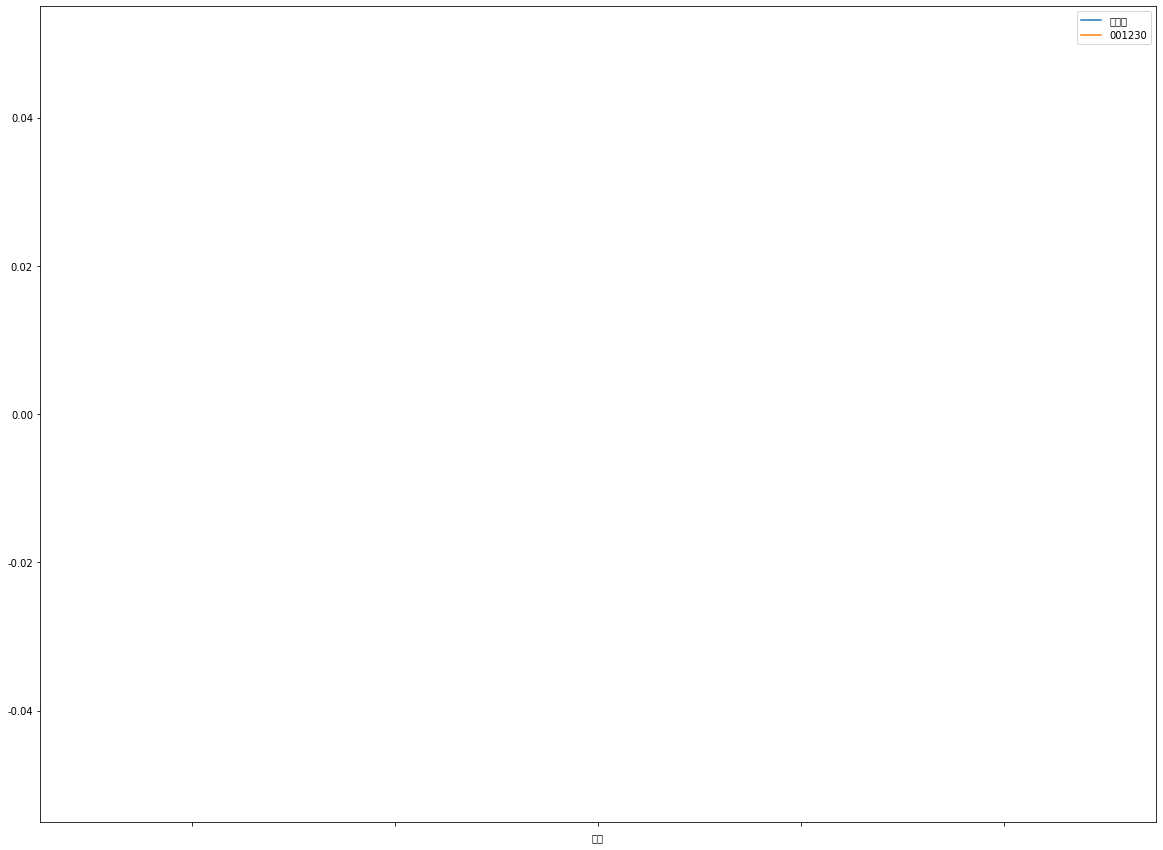

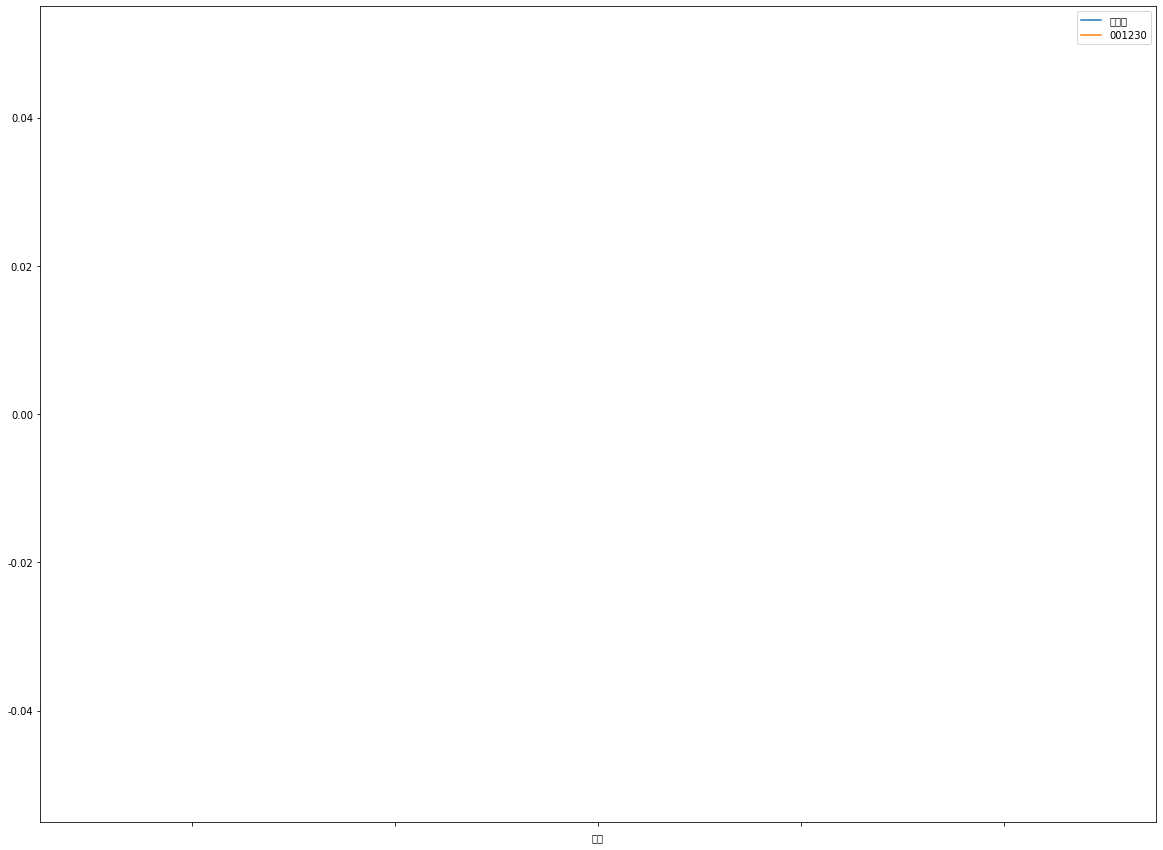

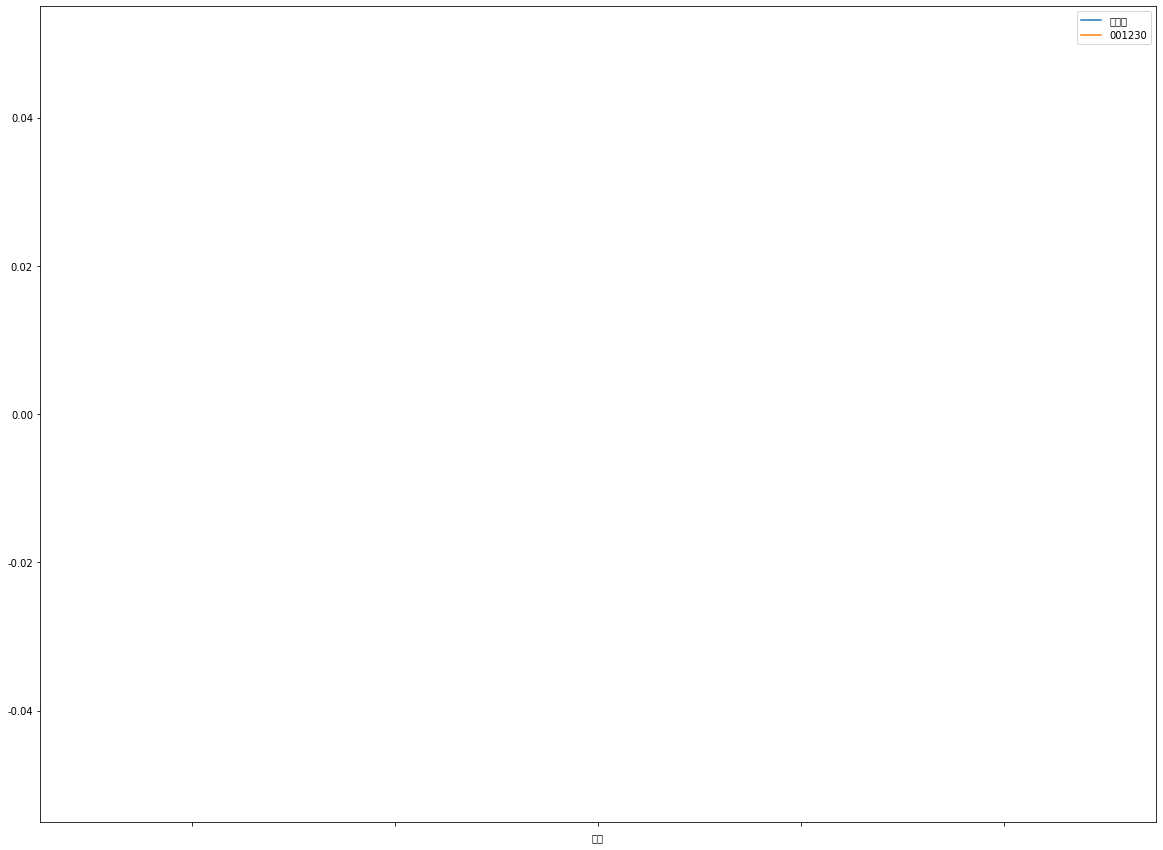

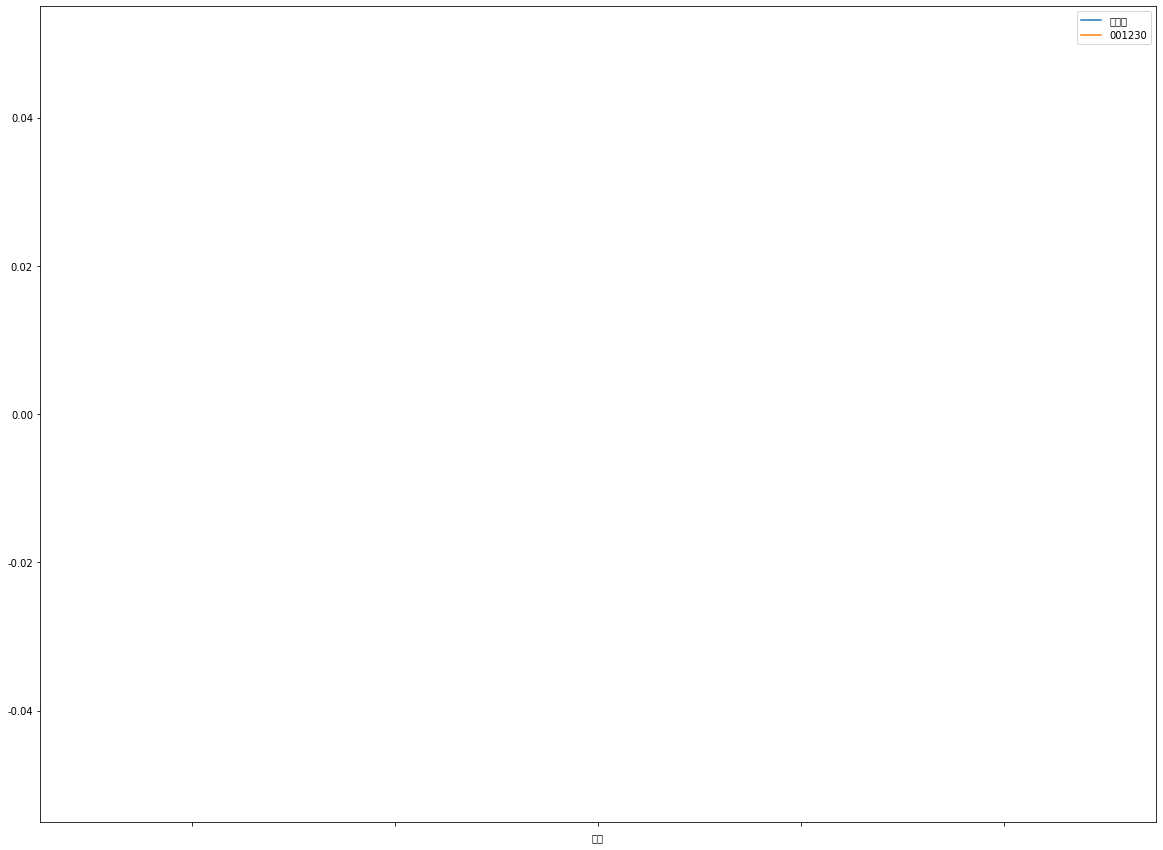

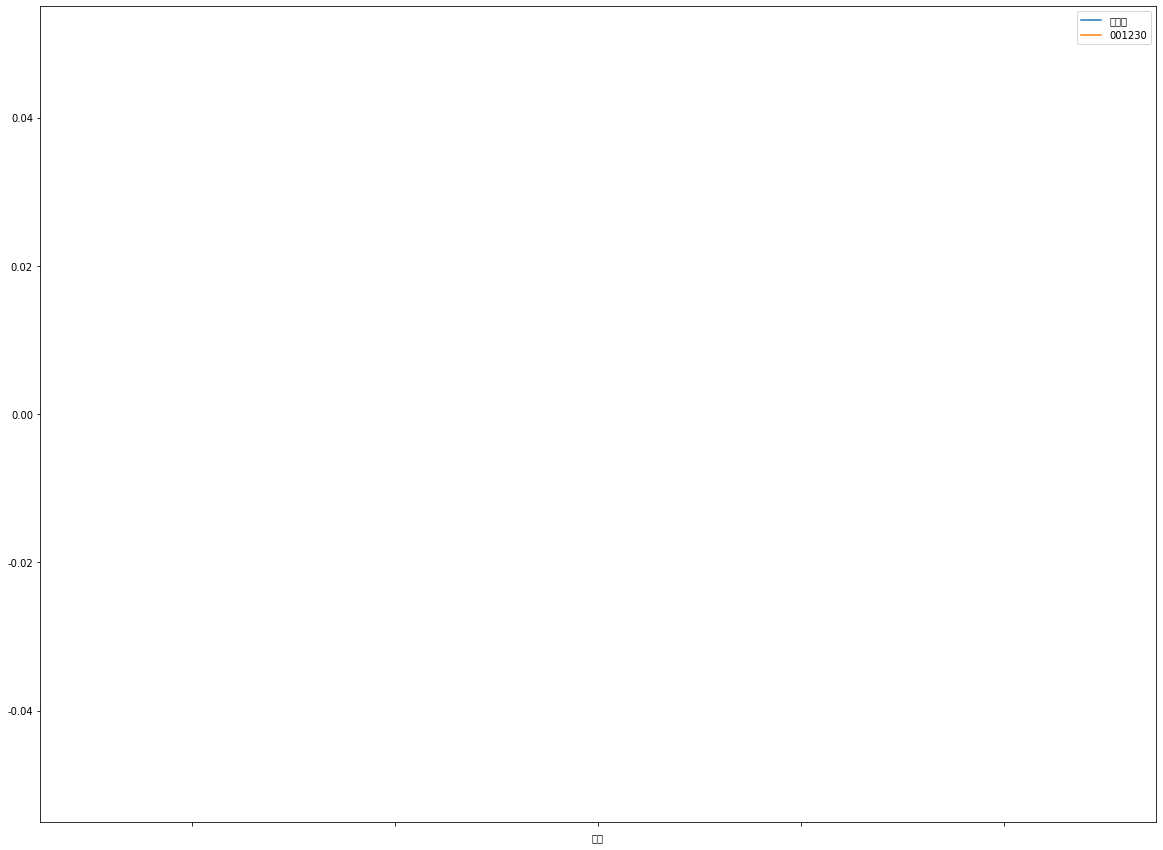

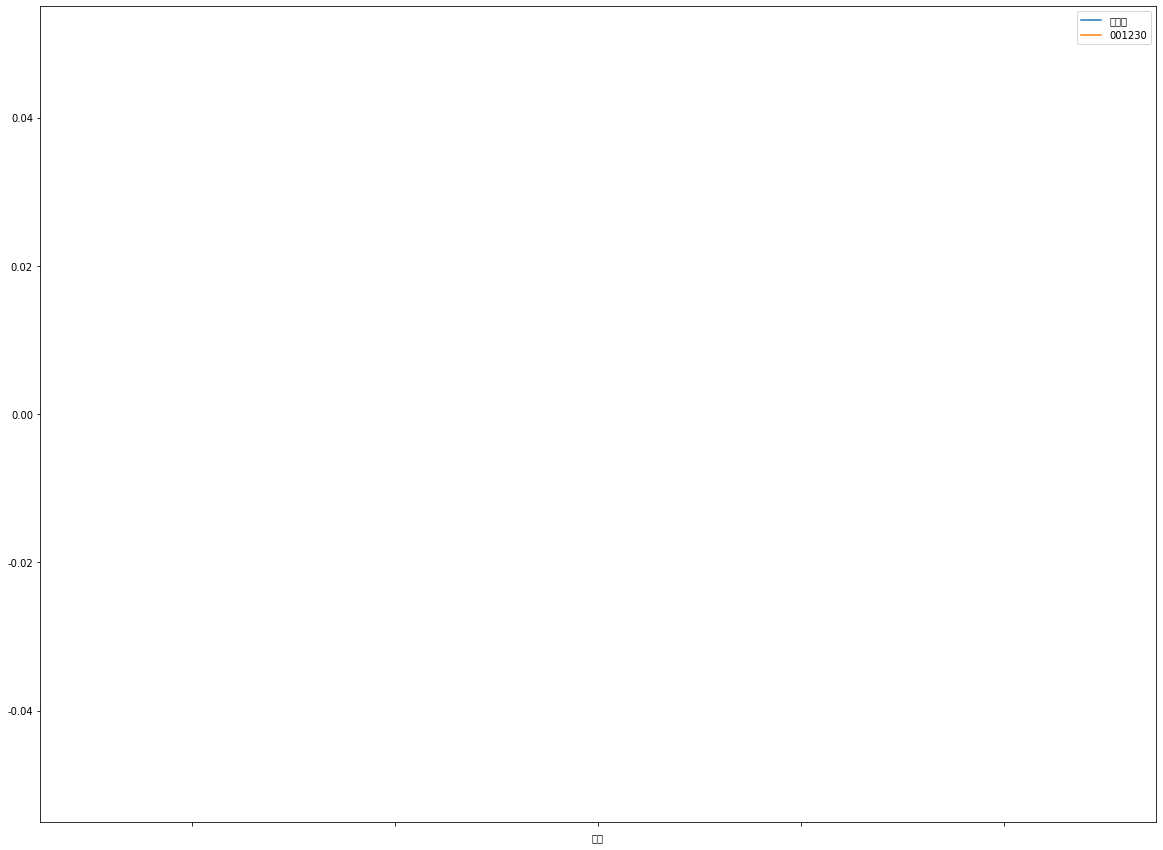

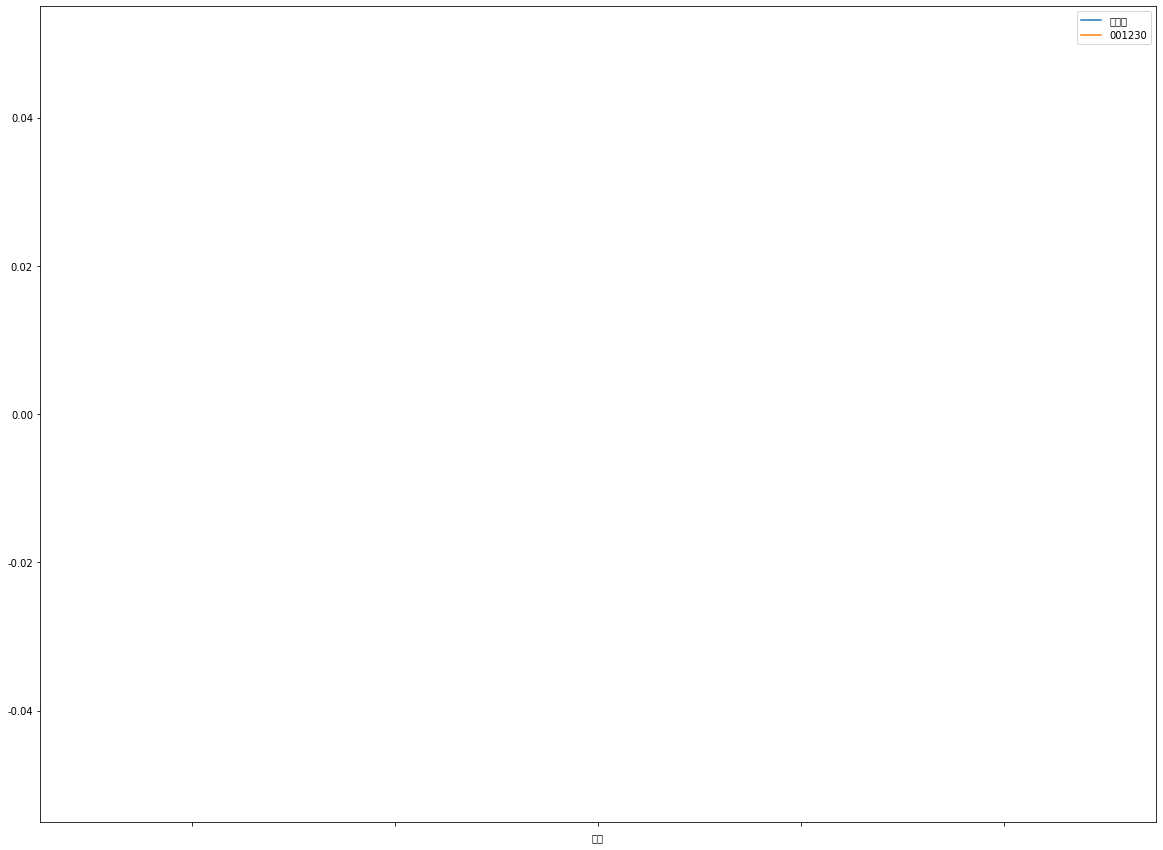

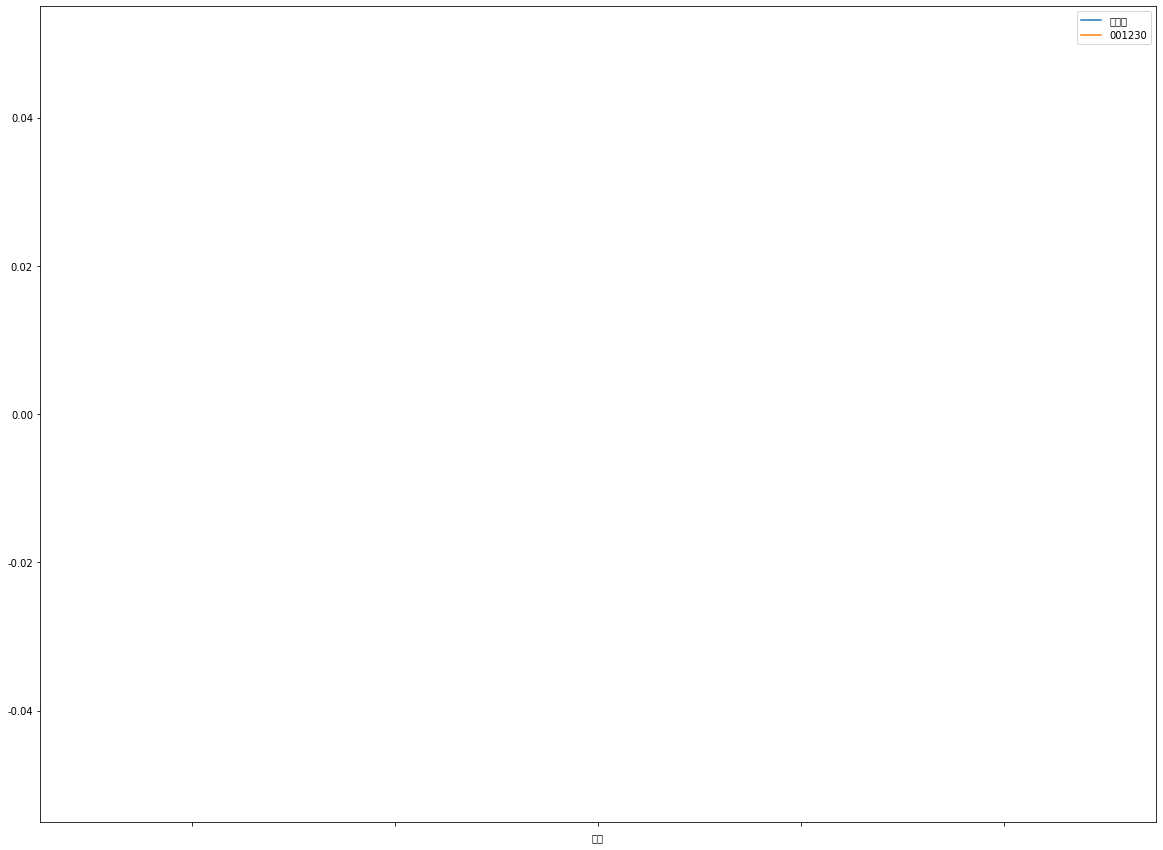

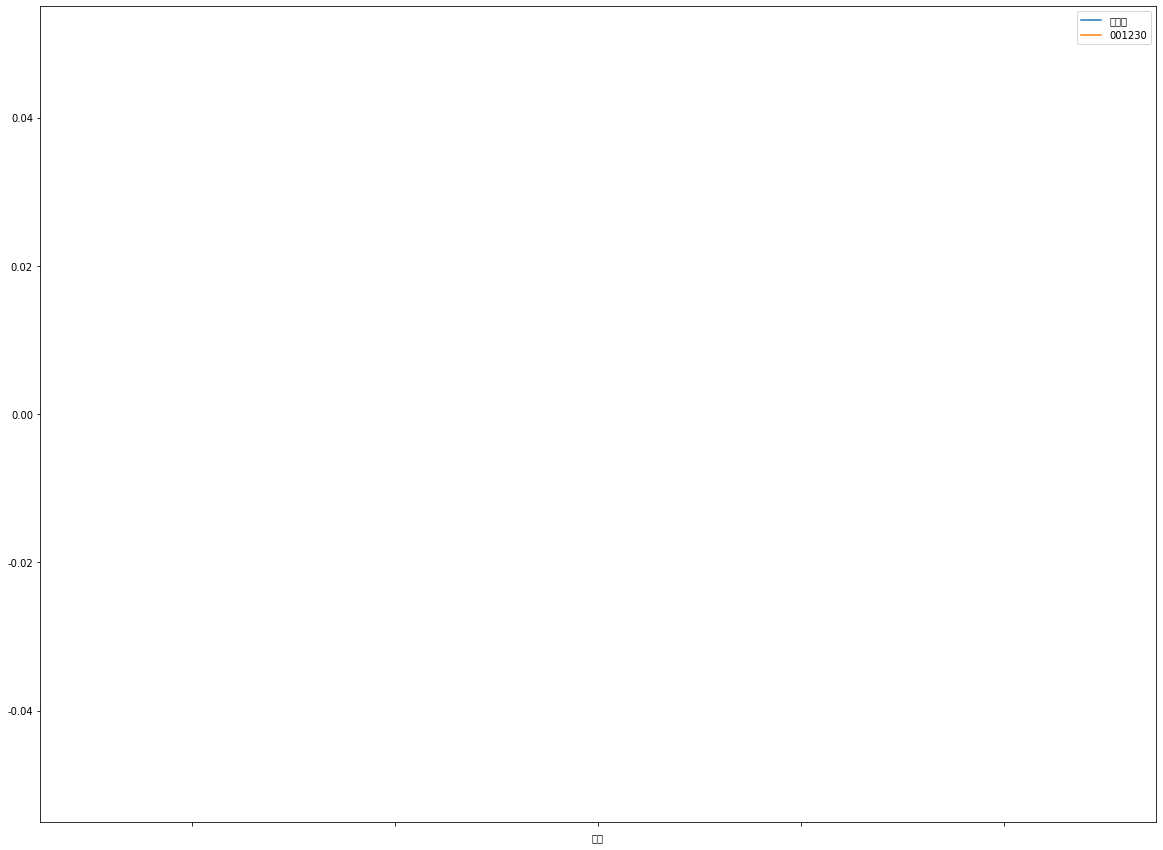

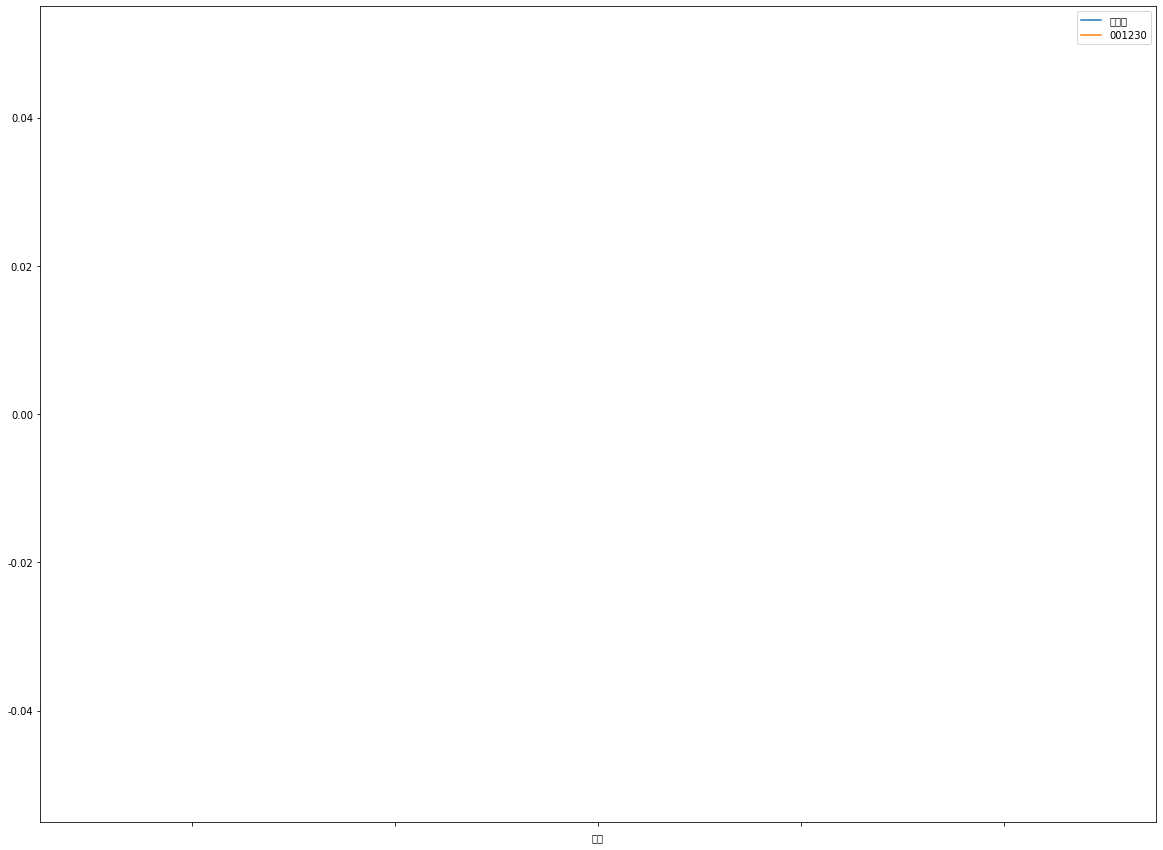

In [15]:

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
for i in range(0,len(corr.index)):
  high_correlation=corr.iloc[i].sort_values(ascending = False)[0:2].index.tolist()
  print(high_correlation)
  print(corr.iloc[i].sort_values(ascending = False)[0:5].tolist())
  df_mean_norm = mean_norm(index1[high_correlation])
  df_mean_norm.plot.line(figsize=(20,15))
